Our data comes in a two-dimensional array of floating point numbers, where each column is a <I>continuous feature </I> that describes the data point.

A particularly common type of feature is the <I>Categorical feature </I>. Also known as a <I>Discrete Feature </I>, that are usually not numeric.

The ditinction between the categorical features and continuous fetaures is analogous to the distinction between classification and regression, only on the input side rather than the output side.

# Question:

## How to represent your data best for a particular application is known as <I>"Feature Engineering"</I>.

Representing data in the right way can have a higher influence on the performance of a supervised model than the exact parameter, we choose.

### Categorical Variables:

In [1]:
# import libraries
import pandas as pd 
import numpy as np

import adult dataset

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

In [3]:
data_col_names = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation",
"relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]

In [4]:
data.shape[1]

15

In [5]:
len(data_col_names)

15

In [6]:
data.sample()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
9796,47,Self-emp-inc,168191,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [7]:
data.columns=data_col_names

In [8]:
# see few rows od dataset -- data
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
# check the 'income' column of data
data['income'].value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [10]:
#check all column names
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Now, taking a few features to analyse the dataset well.

adult_data

In [11]:
# define new variable "adult_data" and store some features in it.
adult_data = data.loc[:,["age","workclass","education","sex","hours_per_week","occupation","income"]]

In [12]:
# look at new DataFrame
adult_data.head()

,age,workclass,education,sex,hours_per_week,occupation,income
0,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
1,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
2,53,Private,11th,Male,40,Handlers-cleaners,<=50K
3,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
4,37,Private,Masters,Female,40,Exec-managerial,<=50K


#### The task is phrased as a classification problem/task with the two classes being income<=50k and >50k.

In [13]:
# checking data-type of each feature variables
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   education       32560 non-null  object
 3   sex             32560 non-null  object
 4   hours_per_week  32560 non-null  int64 
 5   occupation      32560 non-null  object
 6   income          32560 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In this dataset, <I>age</I> and <I>hours_per_week</I> are continuous features.

The <I>workclass, education, sex </I> and <I>occupation</I> features are categorical features.

We may apply <I> Logistic regression classifier </I> here.

?? How to overcome the problem arises due to categorical variable/features.

### One-Hot-Encoding (Dummy Variables)

The most commom way to represent categorical variables is using the <I> one-hot-encoding</I> or <I> one-out-of-N-encoding</I>,
also known as <I>dummy variables</I>.

In [14]:
# see 'workclass' variable
adult_data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

<b>There are 2 ways to do so:
1. Using pd.get_dummies(data)
2. Using Scikit-learn (from sklearn.preprocessing import OneHotEncoder)
</b>

Now,

Use pd.get_dummies()

In [15]:
print("Original features: \n", list(data.columns),"\n")

data_dummies = pd.get_dummies(adult_data)

print("Features after get_dummies: \n", list(data_dummies.columns))

Original features: 
 ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'] 

Features after get_dummies: 
 ['age', 'hours_per_week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'sex_ Female', 'sex_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupat

In the above output, the continuous features were not touched, while the categorical features were expanded into one new feature for each possible value:

In [16]:
# look at new created dummies data
data_dummies.head()

,age,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,37,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


"values" attribute convert the DataFrame into a Numpy array.

and, then I will train a machine learning model on it.

The target variables are now encoded into two "income" columns

so, as a feature

I extract only the column containing features: -- that is all columns from age to occupation_ Transport-moving.

Pandas DataFrame.ix[ ] is both Label and Integer based slicing technique. Besides pure label based and integer based, Pandas provides a hybrid method for selections and subsetting the object using the ix[] operator. ix[] is the most general indexer and will support any of the inputs in loc[] and iloc[].

DataFrame. ix is deprecated from Pandas version 0.20. 0. You can use the more strict indexing method like loc and iloc 

In [17]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']

Now, Extract Numpy Array

In [18]:
data_dummies.columns

Index(['age', 'hours_per_week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'sex_ Female', 'sex_ Male', 'occupation_ ?',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'o

In [19]:
X = features.values

y = data_dummies['income_ >50K'].values

In [20]:
# chcek the shape for both
print(" X.shape {}, y.shape {}".format(X.shape,y.shape))

 X.shape (32560, 44), y.shape (32560,)


Now, data is represented in a way that scikit-learn can work with__

In [21]:
# import necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
# split the data inti train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
# check shape of train and test dataset
X_train.shape, X_test.shape

((24420, 44), (8140, 44))

In [24]:
# shape of target feature
print("Shape of y_train is: {} and shape of y_test is {}".format(y_train.shape, y_test.shape))

Shape of y_train is: (24420,) and shape of y_test is (8140,)


In [25]:
# type of y_train or y_test is:
print(f"type of y_train is: {type(y_train)}" )

type of y_train is: <class 'numpy.ndarray'>


In [26]:
# create a logistic model

logreg = LogisticRegression()

In [27]:
# fiting the training dataset into created model "logreg"
logreg.fit(X_train, y_train)

E:\Users\SHAYAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
logreg

LogisticRegression()

Checking the model accurcay_score on test dataset

In [29]:
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


### Numbers Can Encode Categoricals

In [30]:
demo_df = pd.DataFrame({'Integer Feature': [0,1,2,1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box'] })

In [31]:
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


Using pd.get_dummies() -- will only encode the string feature and will not change the integer feature:

In [32]:
pd.get_dummies(demo_df,) #leaving the integer feature unchanged.

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


To create a dummy_variable for "integer feature", seperately mentioned as columns as a parameter inside pd.get_dummies function.

In [33]:
pd.get_dummies(demo_df, columns=['Integer Feature'])

,Categorical Feature,Integer Feature_0,Integer Feature_1,Integer Feature_2
0,socks,1,0,0
1,fox,0,1,0
2,socks,0,0,1
3,box,0,1,0


add to both as column parameter

In [34]:
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])  # add to both as column parameter

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


Now, convert Integer_Feature as string using <b> .astype(str)

In [35]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)

In [36]:
# check info
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Integer Feature      4 non-null      object
 1   Categorical Feature  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


Now, both have dtype as object,

so, pd.get_dummies() will aplied to both.


In [37]:
pd.get_dummies(demo_df)

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## Binning, Discretization, Linear Models, and Trees

The best way to represent data depends not only on the semantics of data, but also on the kind of model we are using.

Linear and tree-based models (such as decision trees, gradient boosted trees, and random forests), two large and very commonly used families, have very different properties when it comes to how they work with different feature representations.

Take a datatset to proceed further:

<b> wave regression dataset

In [38]:
!pip show mglearn

Name: mglearn
Version: 0.1.9
Summary: Helper functions for the book 'Introduction to machine learning with Python'
Home-page: https://github.com/amueller/introduction_to_ml_with_python
Author: Andreas Mueller
Author-email: t3kcit@gmail.com
License: BSD
Location: e:\users\shayan\anaconda3\lib\site-packages
Requires: cycler, pandas, matplotlib, scikit-learn, joblib, numpy, imageio, pillow
Required-by: 


In [39]:
import mglearn

In [40]:
help(mglearn.datasets)

Help on module mglearn.datasets in mglearn:

NAME
    mglearn.datasets

FUNCTIONS
    load_citibike()
    
    load_extended_boston()
    
    make_forge()
    
    make_signals()
    
    make_wave(n_samples=100)

DATA
    DATA_PATH = r'E:\Users\SHAYAN\anaconda3\lib\site-packages\mglearn\data...

FILE
    e:\users\shayan\anaconda3\lib\site-packages\mglearn\datasets.py




In [41]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [42]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
import seaborn as sns

In [44]:
X.shape, y.shape

((40, 1), (40,))

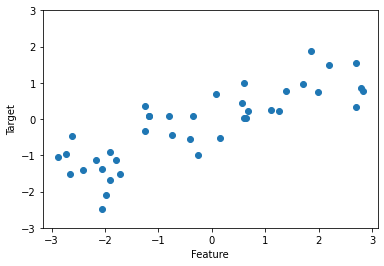

In [45]:
#plot datasets
plt.plot(X,y, 'o')
#set y_limit
plt.ylim(-3,3)
# set x and y label
plt.xlabel('Feature')
plt.ylabel("Target")
plt.show()

It has only a single input feature.

Now, compare the linear regression and a decision tree regressor for this dataset:

In [46]:
#import packages
from sklearn.linear_model  import LinearRegression

from sklearn.tree import DecisionTreeRegressor

In [47]:
# Load dataset with 100 samples and sepearte as X and y
X, y = mglearn.datasets.make_wave(n_samples=100)

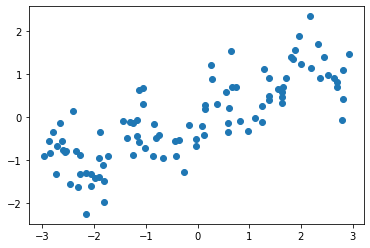

In [48]:
plt.plot(X, y, 'o')

In [49]:
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

Now,

In [50]:
# Build the tree model
reg_tree = DecisionTreeRegressor(min_samples_split=3)

In [51]:
# Fit the training data to reg_tree model
reg_tree.fit(X, y)

DecisionTreeRegressor(min_samples_split=3)

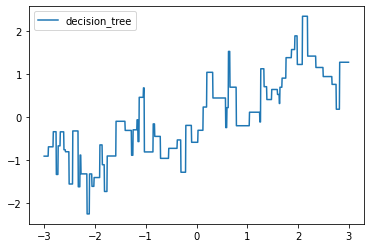

In [52]:
#Plot
plt.plot(line, reg_tree.predict(line), label='decision_tree')
plt.legend()

Now, Build and fit the Linear_regression model

In [53]:
# Build Model
reg_linear = LinearRegression()

In [54]:
# Fitting data to train model
reg_linear.fit(X, y)

LinearRegression()

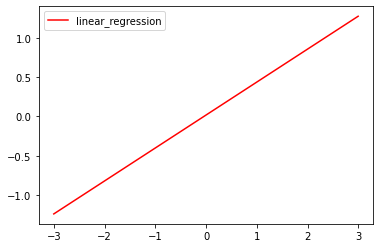

In [55]:
#plot prediction of dataset(line)
plt.plot(line, reg_linear.predict(line), label='linear_regression', c='r')
plt.legend()

Now, plot both plots in one  and compare the predicted value:

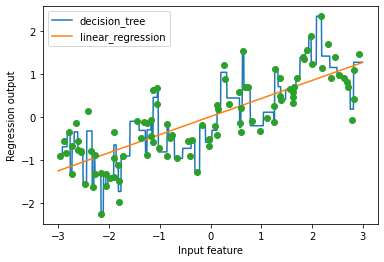

In [56]:
plt.plot(line, reg_tree.predict(line), label='decision_tree')
plt.plot(line, reg_linear.predict(line), label='linear_regression')
plt.plot(X[:,0], y, 'o')  # training data

# set x and y label
plt.xlabel("Input feature")
plt.ylabel("Regression output")
# Show legend
plt.legend(loc='best')
plt.show()

In [57]:
line[:5]

array([[-3.   ],
       [-2.994],
       [-2.988],
       [-2.982],
       [-2.976]])

As we know,

linear models can only model linear relationship, which are lines in case of a single feature.

The decision-tree can build a much more complex model of the data. However, this is strongly dependent on the representation of data

One way to make linear models more powerful on continuous data is to use <b>binning</b> (also known as <b>discretization</b>) of the feature to split it up into multiple features:

We imagine a partition of the input range for the feature(in this case, the numbers are frpm -3 to 3) into a fix number of bins -- say 10.

A data point will then be represented by which bin it falls into. To determine this, we first have to define the bins.

In this case, we'll define 10 bins equally spaced between -3 and 3.
We use the np.linspace function for this case, creating 11 entries.

In [58]:
bins = np.linspace(-3,3, 11)

In [59]:
print(f"bins: {bins}")

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


here, the first bin contains all data points with fetaure values -3 to -2.4, and so on.

Next, we record for each data point which bins it falls into.

This can be easily computed using the <b>np.digitize</b> function.

In [60]:
which_bin = np.digitize(X, bins=bins) # X--training fetaure

In [61]:
print("\n Data points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


 Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


**Note:**

What I did here is transform the single continuous input feature in the wave dataset into a categorical feature that encodes ehich bin a data point is in.

Now,

To use a <I>scikit-learn</I> model on this data, we transform this discrete feature into a <b>one-hot encoding</b> using the OneHotEncoder from the preprocessing module.

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [64]:
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

OneHotEncoder(sparse=False)

In [65]:
encoder

OneHotEncoder(sparse=False)

In [66]:
which_bin.shape

(100, 1)

In [67]:
encoder.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)]

In [68]:
# transform creates the one-hot-encoding
X_binned = encoder.transform(which_bin)

In [69]:
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [70]:
#Shape of X_binned
X_binned.shape

(100, 10)

Now,

Build a new linear regression model and a new decision tree model on the one-hot encoded data.

In [71]:
line[:3]

array([[-3.   ],
       [-2.994],
       [-2.988]])

In [72]:
# binning the line data
line_binned = encoder.transform(np.digitize(line, bins=bins))

In [73]:
# Build Linear regresion Model
reg_line = LinearRegression().fit(X_binned, y)

In [74]:
# Build Decision Tree model
reg_tree = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)

Plotting training and predicted data

Text(0, 0.5, 'Regression Output')

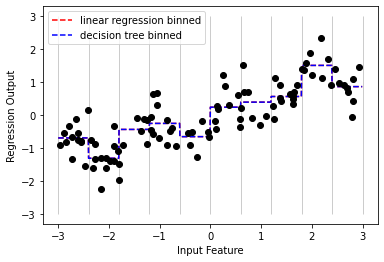

In [75]:
plt.plot(line, reg_line.predict(line_binned),'r--', label='linear regression binned')

plt.plot(line, reg_tree.predict(line_binned),'b--', label='decision tree binned')

plt.plot(X[:,0], y, 'o', c='k') # actual training datasets

plt.vlines(bins, -3,3, linewidth=1, alpha=0.2)

plt.legend(loc='best')
plt.xlabel("Input Feature")
plt.ylabel("Regression Output")

Here, the both lines are exactly on top of each-other, meaning the linear regression and the decision tree make exactly the same predictions.

For each bin they predict a constant value.

Comparing what the model learned before binning the features and after,
we see that the linear model becomes much more flexible, it now has a different value for each bin, while 
the decision tree model got much less flexible.

Hence,

the linear model benefited greatly in expressiveness from the transformation of the data.